In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("global_power_plant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.shape

(908, 25)

We have 908 rows and 25 columns in df dataset

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

These are the total columns present in the dataset,where we have two target variables- 'capacity_mw' & 'primary_fuel'

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Here we have float and string type data,hence encoding needs to be applied

In [6]:
df.capacity_mw.unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

We have float type data present in our first target variable "capacity_mw",hence we will apply regression here

In [7]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [8]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

We have multiple class present in our second target variable "primary_fuel"
Class imbalanced is present,hence we need to apply smote technique

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We have null values present in the dataset,hence we will replace these nan values with 0

# APPLY ENCODING

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0.0,0.0,0.0,658.0,2.5,28.1839,73.2407,6.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,520.0,98.0,24.7663,74.6090,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,2.0,854.0,39.2,21.9038,69.3732,7.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,NaN,NaN,...,2.0,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0,NaN
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,NaN,...,2.0,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,494.0,1600.0,16.2949,77.3568,1.0,2.0,NaN,...,2.0,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0.0,NaN
904,0.0,0.0,904.0,823.0,3.0,12.8932,78.1654,6.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,0.0,0.0,905.0,892.0,25.5,15.2758,75.5811,7.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,0.0,0.0,906.0,540.0,80.0,24.3500,73.7477,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

country                     float64
country_long                float64
name                        float64
gppd_idnr                   float64
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                float64
other_fuel1                 float64
other_fuel2                 float64
other_fuel3                 float64
commissioning_year          float64
owner                       float64
source                      float64
url                         float64
geolocation_source          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source      float64
estimated_generation_gwh    float64
dtype: object

We have converted the datas from string to float type by using  OrdinalEncoder

# TREATING THE NAN VALUES

In [13]:
df=df.replace(np.nan,0)

In [14]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0.0,0.0,0.0,658.0,2.5,28.1839,73.2407,6.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,1.0,520.0,98.0,24.7663,74.6090,1.0,0.0,0.0,...,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,2.0,854.0,39.2,21.9038,69.3732,7.0,0.0,0.0,...,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,0.0,0.0,...,2.0,0.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,0.0,...,2.0,0.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,494.0,1600.0,16.2949,77.3568,1.0,2.0,0.0,...,2.0,0.0,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,0.0,0.0
904,0.0,0.0,904.0,823.0,3.0,12.8932,78.1654,6.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
905,0.0,0.0,905.0,892.0,25.5,15.2758,75.5811,7.0,0.0,0.0,...,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
906,0.0,0.0,906.0,540.0,80.0,24.3500,73.7477,1.0,0.0,0.0,...,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


Nan values are no longer present in the dataset 

In [15]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,...,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.0
mean,0.0,0.0,453.50000,453.50000,321.046378,20.122373,73.524278,3.205947,0.433921,0.0,...,1.691630,0.0,1155.682819,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,0.0,0.0
std,0.0,0.0,262.26132,262.26132,580.221767,7.661373,17.653769,2.281339,0.823467,0.0,...,0.719592,0.0,998.831267,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866,0.0,0.0
min,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.0,226.75000,226.75000,16.837500,16.130025,73.812975,1.000000,0.000000,0.0,...,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.0,453.50000,453.50000,60.000000,21.278850,76.492900,3.000000,0.000000,0.0,...,2.000000,0.0,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.0,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,0.000000,0.0,...,2.000000,0.0,2018.000000,470.116200,570.095213,605.769975,669.808766,708.134037,0.0,0.0
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,0.0,...,2.000000,0.0,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0,0.0


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',skewness might be present in these columns
 2. we observe extreme difference between the 75th percentile and max in column 'capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',outliers can be present in these columns


# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

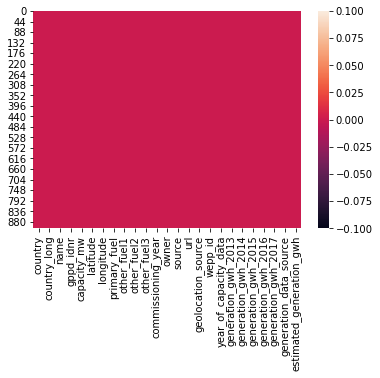

In [16]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [17]:
cor=df.corr()
cor

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.125127,-0.024882,0.038752,0.016852,NaN,...,0.012251,NaN,0.023620,0.075314,0.079470,0.069114,0.062994,0.065140,NaN,NaN
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.102520,-0.132079,0.607373,-0.383604,NaN,...,-0.511339,NaN,-0.856826,-0.246174,-0.249356,-0.253843,-0.265457,-0.268714,NaN,NaN
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.102400,0.153023,-0.377783,0.625638,NaN,...,0.221092,NaN,0.416879,0.776258,0.827206,0.853262,0.886996,0.902431,NaN,NaN
latitude,NaN,NaN,-0.125127,-0.102520,0.102400,1.000000,0.591159,-0.087607,0.077144,NaN,...,-0.036576,NaN,0.058579,0.098305,0.101381,0.096814,0.089991,0.103028,NaN,NaN
longitude,NaN,NaN,-0.024882,-0.132079,0.153023,0.591159,1.000000,-0.216409,0.139548,NaN,...,0.224377,NaN,0.109185,0.116155,0.119508,0.121422,0.124910,0.131342,NaN,NaN
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.087607,-0.216409,1.000000,-0.497180,NaN,...,-0.545571,NaN,-0.500012,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809,NaN,NaN
other_fuel1,NaN,NaN,0.016852,-0.383604,0.625638,0.077144,0.139548,-0.497180,1.000000,NaN,...,0.226062,NaN,0.455426,0.479485,0.511089,0.522660,0.546683,0.563909,NaN,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

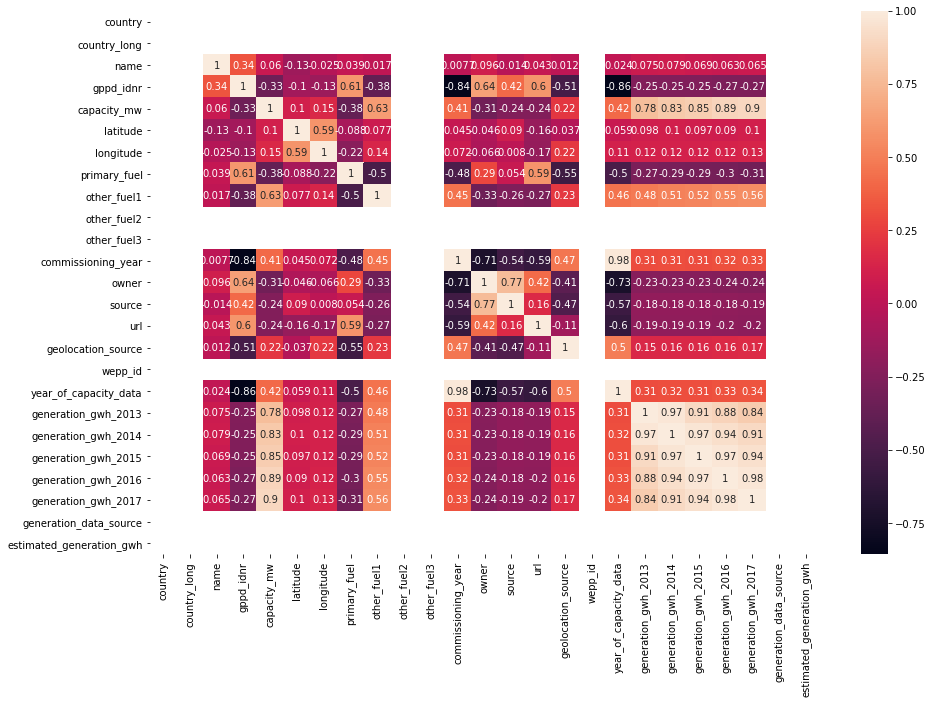

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

Observation:
    
Light shades are highly correlated and dark shades are negatively correated 
    
"capacity_mw" is positively correlated with column       "other_fuel1",'commissioning_year','generation_gwh_2013','generation_gwh_2014',generation_gwh_2015,'generation_gwh_2016','generation_gwh_2017' and
highly negatively correlated with column 'gppd_idnr','primary_fuel', 'owner', 'source', 'url'


our 2nd target variable 'primary_fuel' is negatively correated with column 'capacity_mw','other_fuel1','geolocation_source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017' and 
positively correlated with 'gppd_idnr','owner', 'url'

In [19]:
df.drop(["country","country_long","other_fuel2","other_fuel3","wepp_id","generation_data_source","estimated_generation_gwh"],axis=1,inplace=True)

In [20]:
df.drop(["latitude"],axis=1,inplace=True)

As column "country","country_long","other_fuel2","other_fuel3","wepp_id","generation_data_source","estimated_generation_gwh" showing nan correlation in the dataset ,hence we dropped these columns. We will also drop "latitude" as its giving negative correlation with both the target variable 

In [21]:
df.shape

(908, 17)

Dropped columns are no longer present in the dataset 

# TO CHECK THE COUNT OF DATA IN TARGET COLUMN

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

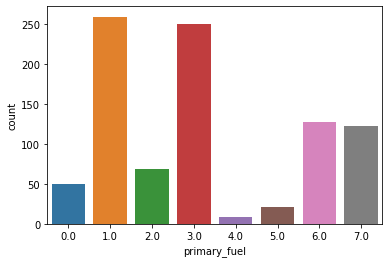

In [22]:
sns.countplot(df["primary_fuel"])

Datas are not equally divided in "primary_fuel",class imbalance is present

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

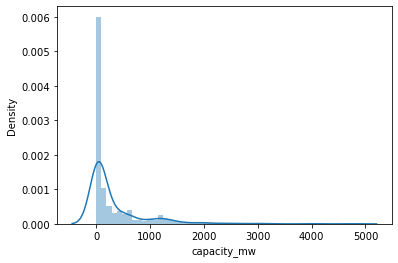

In [23]:
sns.distplot(df["capacity_mw"])

Skewness is present in "capacity_mw"

<AxesSubplot:xlabel='name', ylabel='Density'>

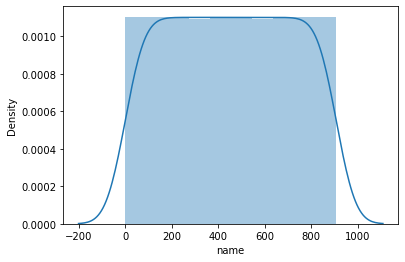

In [24]:
sns.distplot(df["name"])

Datas are equally distributed in "name"

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

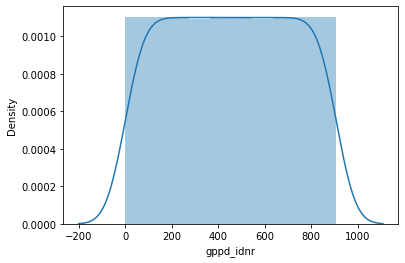

In [25]:
sns.distplot(df["gppd_idnr"])

Datas are equally distributed in "gppd_idnr"

<AxesSubplot:xlabel='longitude', ylabel='Density'>

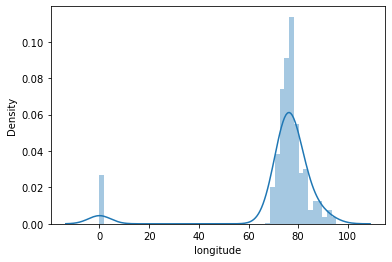

In [26]:
sns.distplot(df["longitude"])

Skewness is present in "longitude"

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

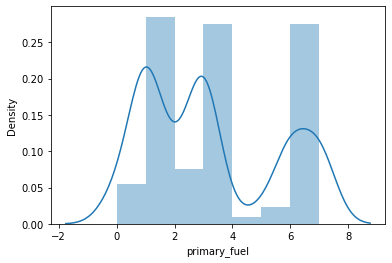

In [27]:
sns.distplot(df["primary_fuel"])

Datas are not equally distributed in "primary_fuel"

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

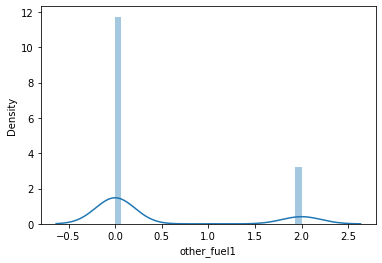

In [28]:
sns.distplot(df["other_fuel1"])

Skewness is present in "other_fuel1"

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

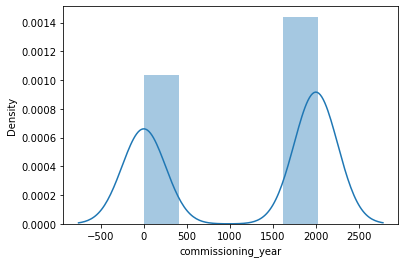

In [29]:
sns.distplot(df["commissioning_year"])

Datas are not equally distributed in "commissioning_year"

<AxesSubplot:xlabel='owner', ylabel='Density'>

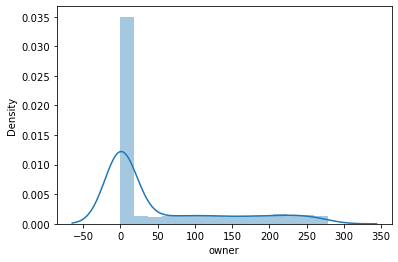

In [30]:
sns.distplot(df["owner"])

Skewness is present in "owner"

<AxesSubplot:xlabel='source', ylabel='Density'>

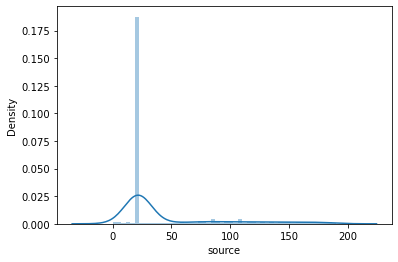

In [31]:
sns.distplot(df["source"])

Skewness is present in "source"

<AxesSubplot:xlabel='url', ylabel='Density'>

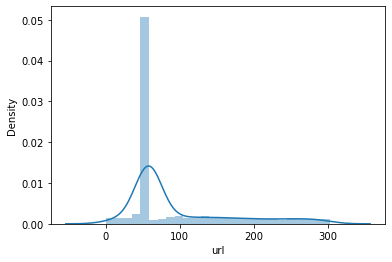

In [32]:
sns.distplot(df["url"])

Skewness is present in "url"

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

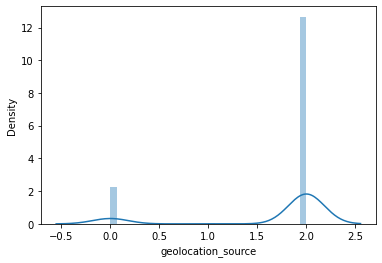

In [33]:
sns.distplot(df["geolocation_source"])

Datas are not equally distributed in "geolocation_source"

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

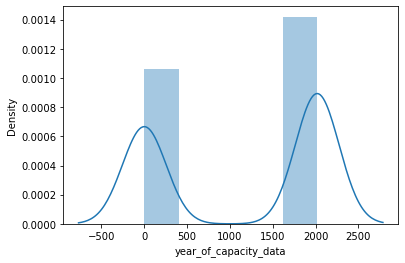

In [34]:
sns.distplot(df["year_of_capacity_data"])

Datas are not equally distributed in "year_of_capacity_data"

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

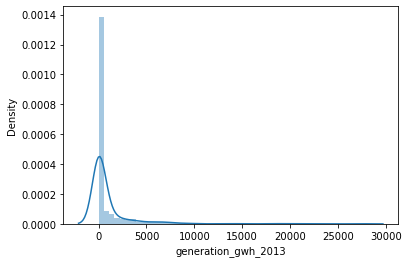

In [35]:
sns.distplot(df["generation_gwh_2013"])

Skewness is present in "generation_gwh_2013"

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

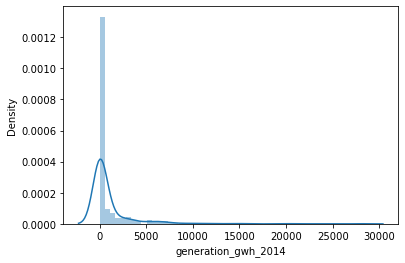

In [36]:
sns.distplot(df["generation_gwh_2014"])

Skewness is present in "generation_gwh_2014"

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

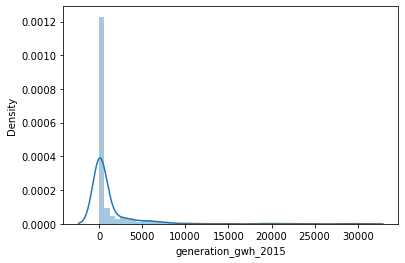

In [37]:
sns.distplot(df["generation_gwh_2015"])

Skewness is present in "generation_gwh_2015"

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

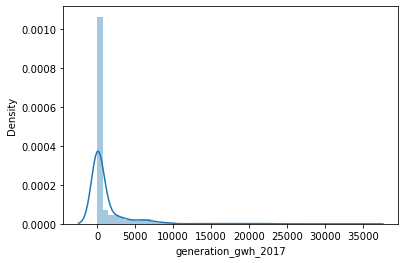

In [39]:
sns.distplot(df["generation_gwh_2017"])

Skewness is present in "generation_gwh_2017"

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='name', ylabel='Count'>

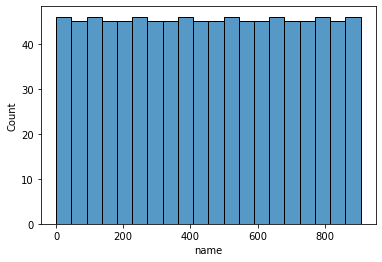

In [40]:
sns.histplot(df["name"],bins=20)

Data spread in column "name" is from 0 to 800

<AxesSubplot:xlabel='gppd_idnr', ylabel='Count'>

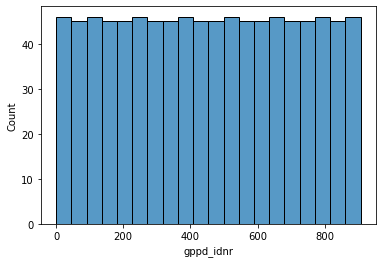

In [41]:
sns.histplot(df["gppd_idnr"],bins=20)

Data spread in column "gppd_idnr" is from 0 to 800

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

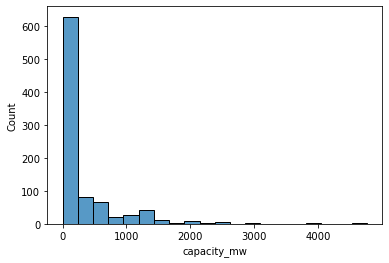

In [42]:
sns.histplot(df["capacity_mw"],bins=20)

Data spread in column "capacity_mw" is  mostly from 0 to 2000

<AxesSubplot:xlabel='longitude', ylabel='Count'>

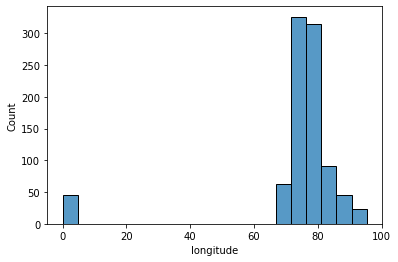

In [43]:
sns.histplot(df["longitude"],bins=20)

Data spread in column "longitute" is  mostly from 70 to 90

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

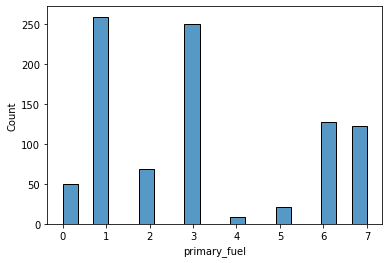

In [44]:
sns.histplot(df["primary_fuel"],bins=20)

Data spread in column "primary_fuel" is from 0 to 7

<AxesSubplot:xlabel='other_fuel1', ylabel='Count'>

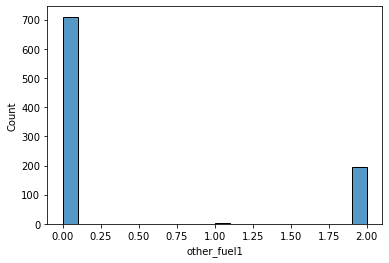

In [45]:
sns.histplot(df["other_fuel1"],bins=20)

Data spread in column "other_fuel1" is between 0 and 2

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Count'>

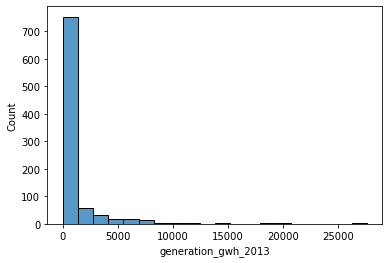

In [46]:
sns.histplot(df["generation_gwh_2013"],bins=20)

Data spread in column "generation_gwh_2013" is mostly between 0 and 10000

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

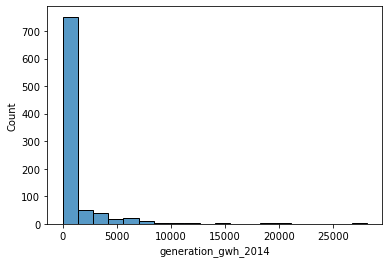

In [47]:
sns.histplot(df["generation_gwh_2014"],bins=20)

Data spread in column "generation_gwh_2014" is mostly between 0 and 10000

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

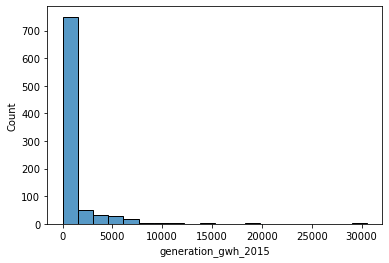

In [48]:
sns.histplot(df["generation_gwh_2015"],bins=20)

Data spread in column "generation_gwh_2015" is mostly between 0 and 10000

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

### BIVARIATE ANALYSIS 

<AxesSubplot:xlabel='gppd_idnr', ylabel='capacity_mw'>

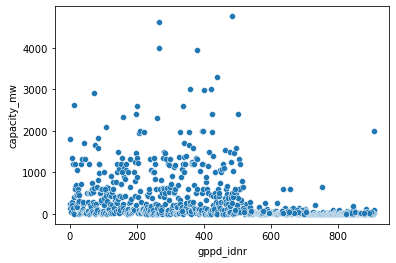

In [49]:
sns.scatterplot(x="gppd_idnr",y="capacity_mw",data=df)

High Data spread is 0 to 500,and very less has appeared from 600 to 900

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

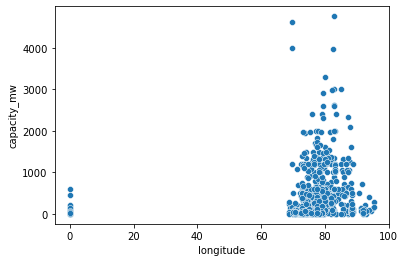

In [50]:
sns.scatterplot(x="longitude",y="capacity_mw",data=df)

High Data spread is 70 to 90,and very less has appeared in 0

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

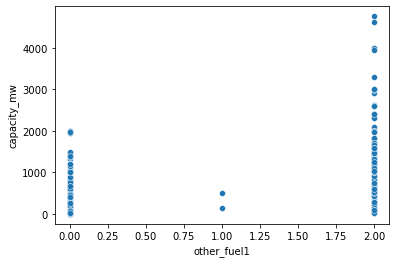

In [51]:
sns.scatterplot(x="other_fuel1",y="capacity_mw",data=df)

Data spread is between 0, 1.00 and 2.00

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

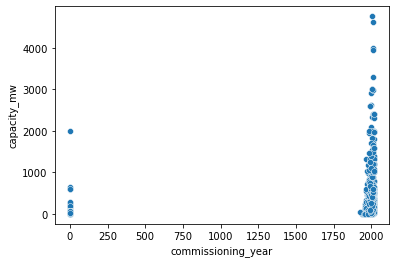

In [52]:
sns.scatterplot(x="commissioning_year",y="capacity_mw",data=df)

Data spread is between 0 and 2000

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

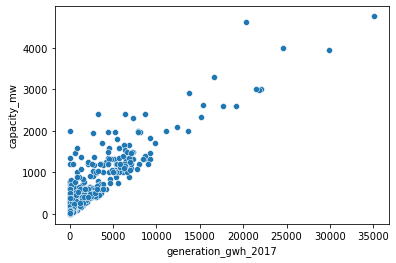

In [54]:
sns.scatterplot(x="generation_gwh_2017",y="capacity_mw",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 35000

<AxesSubplot:xlabel='url', ylabel='primary_fuel'>

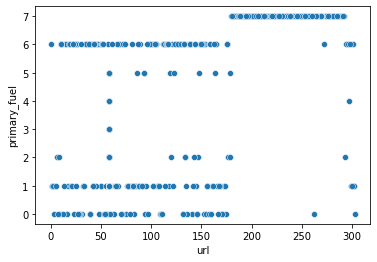

In [55]:
sns.scatterplot(x="url",y="primary_fuel",data=df)

Data spread is between 0 to 300

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

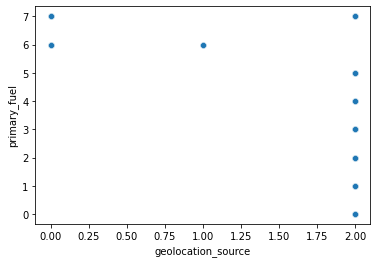

In [56]:
sns.scatterplot(x="geolocation_source",y="primary_fuel",data=df)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='primary_fuel'>

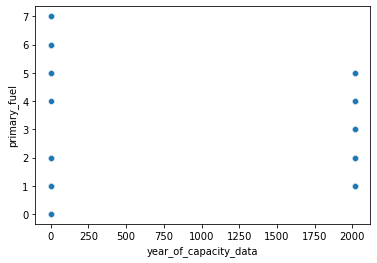

In [186]:
sns.scatterplot(x="year_of_capacity_data",y="primary_fuel",data=df)

Data spread is between 0 and 2000

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

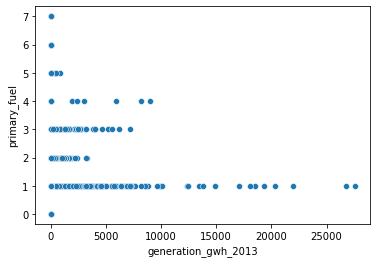

In [58]:
sns.scatterplot(x="generation_gwh_2013",y="primary_fuel",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 30000

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

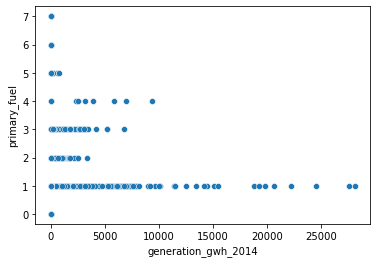

In [59]:
sns.scatterplot(x="generation_gwh_2014",y="primary_fuel",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 30000

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

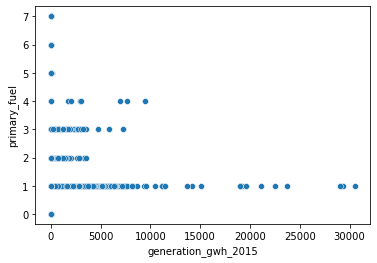

In [60]:
sns.scatterplot(x="generation_gwh_2015",y="primary_fuel",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 30000

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

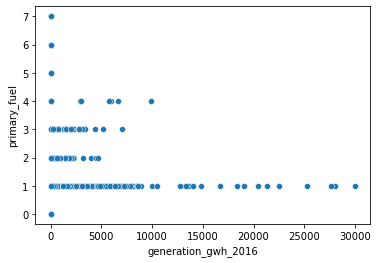

In [61]:
sns.scatterplot(x="generation_gwh_2016",y="primary_fuel",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 30000

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

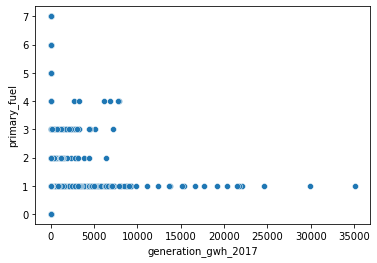

In [62]:
sns.scatterplot(x="generation_gwh_2017",y="primary_fuel",data=df)

High data spread is between 0 to 10000 and very less has appeared from 15000 to 35000

# TO CHECK THE RELATION BETWEEN ALL THE COLUMNS

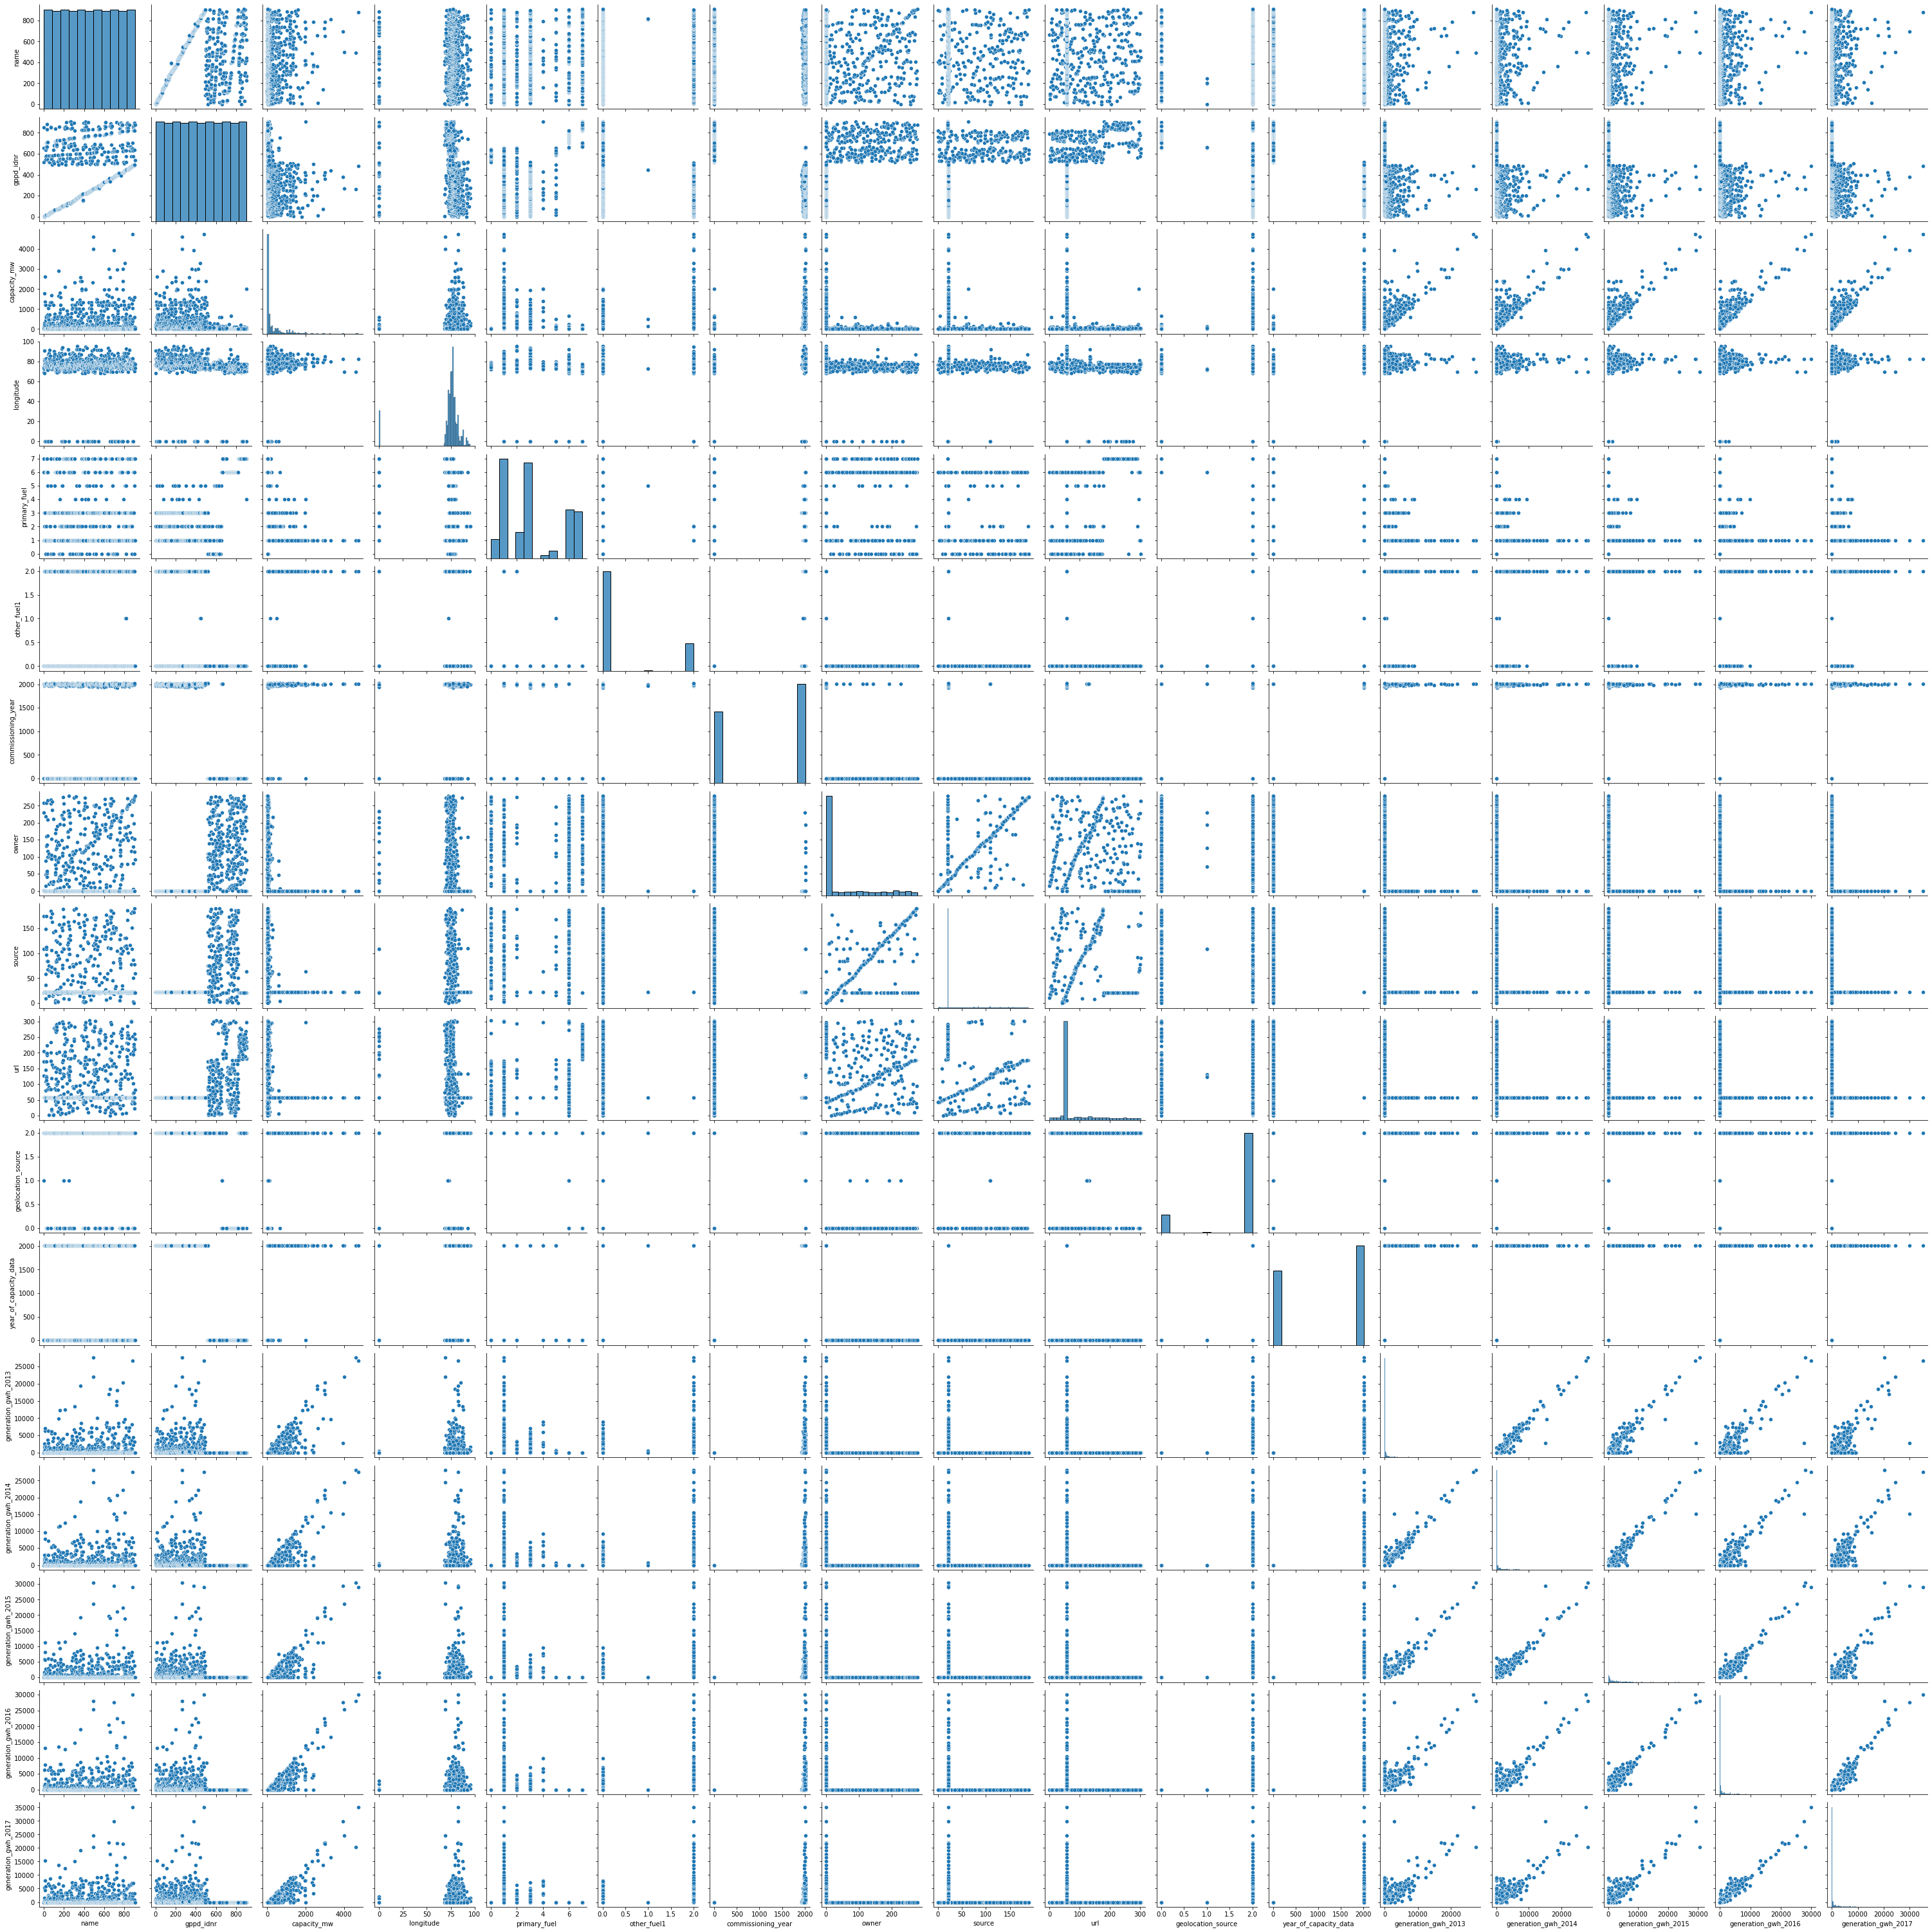

In [63]:
sns.pairplot(df)

# PLOTTING OUTLIERS

name                        AxesSubplot(0.125,0.536818;0.0731132x0.343182)
gppd_idnr                AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
capacity_mw              AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
longitude                AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
primary_fuel             AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
other_fuel1              AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
commissioning_year       AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
owner                    AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
source                   AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
url                            AxesSubplot(0.125,0.125;0.0731132x0.343182)
geolocation_source          AxesSubplot(0.212736,0.125;0.0731132x0.343182)
year_of_capacity_data       AxesSubplot(0.300472,0.125;0.0731132x0.343182)
generation_gwh_2013         AxesSubplot(0.388208,0.125;0.0731132x0.343182)
generation_gwh_2014      

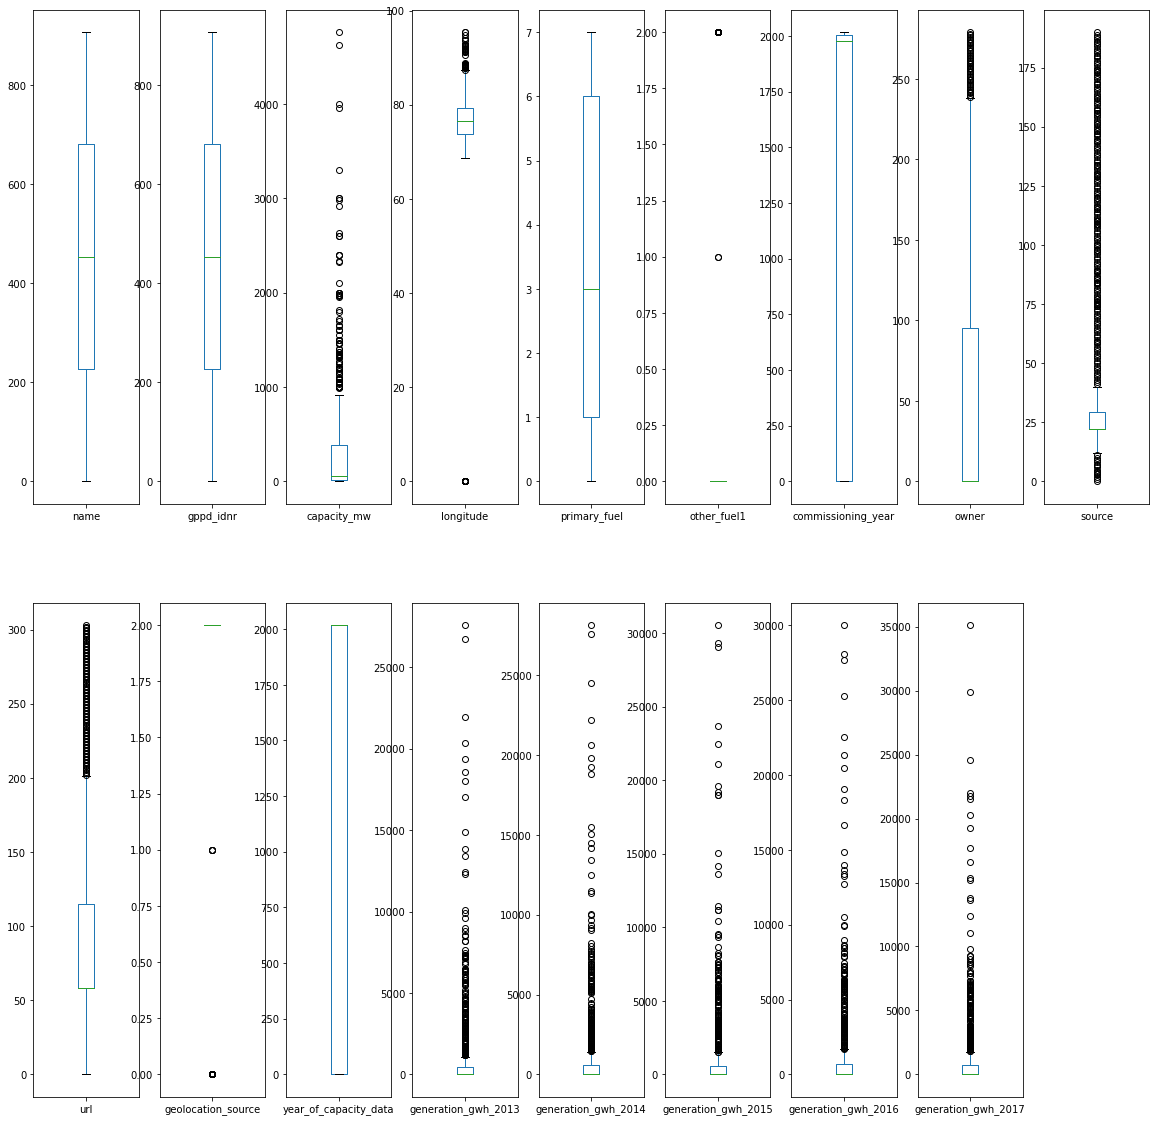

In [64]:
df.plot(kind="box",subplots=True,layout=(2,9),figsize=(20,20))    

We have outliers present in 'capacity_mw','latitude','longitude','other_fuel1','owner','source','url', 'geolocation_source','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017'

# Removing OUTLIERS

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73014431, 0.78018635, 0.54931054, ..., 0.36425979, 0.37762486,
        0.38797208],
       [1.72632922, 0.25370363, 0.38462759, ..., 0.36425979, 0.37762486,
        0.38797208],
       [1.72251413, 1.52794443, 0.48602401, ..., 0.36425979, 0.37762486,
        0.38797208],
       ...,
       [1.72251413, 1.67291793, 0.50964868, ..., 0.36425979, 0.37762486,
        0.38797208],
       [1.72632922, 0.33000548, 0.41566731, ..., 0.36425979, 0.37762486,
        0.38797208],
       [1.73014431, 1.61569155, 0.52516854, ..., 0.36425979, 0.37762486,
        0.38797208]])

In [68]:
threshold=3
print(np.where(z>3))

(array([ 14,  15,  15,  15,  15,  25,  43,  46,  68,  72,  73,  81, 144,
       144, 144, 144, 144, 144, 159, 159, 179, 192, 193, 202, 209, 210,
       210, 210, 210, 210, 210, 251, 300, 309, 309, 309, 309, 309, 309,
       322, 330, 331, 333, 346, 364, 365, 365, 365, 365, 365, 365, 376,
       387, 421, 423, 431, 436, 441, 467, 479, 480, 483, 484, 494, 494,
       494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 503, 533, 533,
       539, 541, 546, 624, 649, 649, 649, 649, 649, 649, 656, 658, 658,
       658, 658, 658, 658, 662, 670, 675, 681, 690, 696, 696, 696, 696,
       696, 706, 712, 713, 722, 722, 722, 722, 722, 725, 725, 725, 725,
       725, 727, 727, 727, 727, 727, 727, 732, 733, 742, 771, 774, 775,
       776, 777, 785, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 829, 833, 871, 872, 880, 881, 881, 881, 881, 881,
       881, 885, 887, 896, 901], dtype=int64), array([ 3,  2, 14, 15, 16,  3,  3,  3,  3,  8,  3,  8,  2, 12, 13, 14, 15,
       16, 12

In [69]:
df_new=df[(z<3).all(axis=1)]
df_new

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.0,658.0,2.5,73.2407,6.0,0.0,2011.0,229.0,109.0,128.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,520.0,98.0,74.6090,1.0,0.0,0.0,258.0,174.0,173.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,854.0,39.2,69.3732,7.0,0.0,0.0,2.0,21.0,205.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,0.0,135.0,91.3602,2.0,0.0,2004.0,0.0,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,4.0,1.0,1800.0,82.4091,1.0,2.0,2015.0,0.0,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,1600.0,77.3568,1.0,2.0,2016.0,0.0,22.0,58.0,2.0,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000
904,904.0,823.0,3.0,78.1654,6.0,0.0,0.0,114.0,77.0,22.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,905.0,892.0,25.5,75.5811,7.0,0.0,0.0,0.0,21.0,260.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
906,906.0,540.0,80.0,73.7477,1.0,0.0,0.0,91.0,59.0,82.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
df.shape

(908, 17)

In [71]:
84/908

0.09251101321585903

We have lost 0.09% data by removing outliers

In [72]:
df=df_new
df

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.0,658.0,2.5,73.2407,6.0,0.0,2011.0,229.0,109.0,128.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,520.0,98.0,74.6090,1.0,0.0,0.0,258.0,174.0,173.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,854.0,39.2,69.3732,7.0,0.0,0.0,2.0,21.0,205.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,0.0,135.0,91.3602,2.0,0.0,2004.0,0.0,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,4.0,1.0,1800.0,82.4091,1.0,2.0,2015.0,0.0,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903.0,494.0,1600.0,77.3568,1.0,2.0,2016.0,0.0,22.0,58.0,2.0,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000
904,904.0,823.0,3.0,78.1654,6.0,0.0,0.0,114.0,77.0,22.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,905.0,892.0,25.5,75.5811,7.0,0.0,0.0,0.0,21.0,260.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
906,906.0,540.0,80.0,73.7477,1.0,0.0,0.0,91.0,59.0,82.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


# DIVIDING THE COLUMNS AS x AND y

In [73]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

# APPLYING variance_inflation_factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
x.shape

(824, 16)

In [76]:
x.shape[1]

16

In [77]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [78]:
vif_calc()

    VIF FACTOR               features
0     8.998797                   name
1    39.503096              gppd_idnr
2    76.653840              longitude
3    14.453772           primary_fuel
4     3.039992            other_fuel1
5   120.478919     commissioning_year
6     5.351705                  owner
7     7.679407                 source
8     9.522218                    url
9    25.349706     geolocation_source
10  142.991699  year_of_capacity_data
11   15.049153    generation_gwh_2013
12   27.733361    generation_gwh_2014
13   20.066227    generation_gwh_2015
14   22.372641    generation_gwh_2016
15   13.586453    generation_gwh_2017


In [79]:
df.drop(["source","generation_gwh_2016","geolocation_source","generation_gwh_2017"],axis=1,inplace=True)

Multicollinearity is visiable between the columns,hence we dropped "source","generation_gwh_2016","geolocation_source","generation_gwh_2017" as they were giving less values

# REMOVING THE SKEWNESS 

In [80]:
df.skew()

name                     0.031375
gppd_idnr               -0.003793
capacity_mw              1.952050
longitude                1.153765
primary_fuel             0.468927
other_fuel1              1.463395
commissioning_year      -0.304471
owner                    1.346651
url                      1.550902
year_of_capacity_data   -0.284904
generation_gwh_2013      2.831343
generation_gwh_2014      2.711017
generation_gwh_2015      2.537737
dtype: float64

In [81]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [82]:
x

array([[-2.18257403,  0.79582282, -0.90993303, ..., -0.87699689,
        -0.89291925, -0.89525131],
       [-2.16172222,  0.33889481, -0.50583525, ..., -0.87699689,
        -0.89291925, -0.89525131],
       [-2.14399053,  1.39905657, -2.33768889, ..., -0.87699689,
        -0.89291925, -0.89525131],
       ...,
       [ 1.56294076,  1.51105478, -0.24490381, ..., -0.87699689,
        -0.89291925, -0.89525131],
       [ 1.56582921,  0.40714176, -0.75488465, ..., -0.87699689,
        -0.89291925, -0.89525131],
       [ 1.56871668,  1.46701567,  0.20915214, ..., -0.87699689,
        -0.89291925, -0.89525131]])

Applied power_transform method to remove the skewness 

# APPLYING VARIOUS MODEL

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

lr.score(x_train,y_train)

0.5748626082074999

In [85]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5924900223689156


By applying LinearRegression we are getting the accuracy of 0.59

# KNeighborsRegressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5677563825983191


By applying KNeighborsRegressor we are getting the accuracy of 0.56

# GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print(r2_score(y_test,pred_test))

0.8610793007978731


By applying GradientBoostingRegressor we are getting the accuracy of 0.86

# DecisionTreeRegressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.6508300690817944


By applying DecisionTreeRegressor we are getting the accuracy of 0.65

# REGULARIZATION 

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [90]:
from sklearn.linear_model import Lasso 


parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [91]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5520010934596571

# CHECKING THE CROSS VALIDATION SCORE

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.5553553628346153


In [94]:
print(cross_val_score(knr,x,y,cv=4).mean())

0.5847510545396373


In [95]:
print(cross_val_score(gb,x,y,cv=2).mean())

0.7650055566774493


In [96]:
print(cross_val_score(dtr,x,y,cv=4).mean())

0.6346014497428835


In [97]:
print(cross_val_score(ls,x,y,cv=4).mean())

0.5486888663009701


# ENSEMBLE TECHNIQUE

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [99]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [100]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2_score:',rfs*100)


rfc=(cross_val_score(rf,x,y,cv=5).mean())
print("cross_val_score:",rfc*100)

R2_score: 83.51571256716043
cross_val_score: 78.33226428989146


As we can see RandomForestRegressor is giving the best accuracy score as there is less difference between the cross validation score and accuracy score

# SAVING THE BEST MODEL

In [101]:
import joblib
joblib.dump(rf,"best_rfglobalfile.obj")

['best_rfglobalfile.obj']

# DIVIDING THE COLUMNS AS dfx AND dfy

In [102]:
dfx=df.drop("primary_fuel",axis=1)
dfy=df["primary_fuel"]

In [103]:
dfx.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'longitude', 'other_fuel1',
       'commissioning_year', 'owner', 'url', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015'],
      dtype='object')

# APPLYING variance_inflation_factor

In [104]:
dfx.shape[1]

12

In [105]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(dfx.values,i) for i in range (dfx.shape[1])]
    vif["features"]=dfx.columns
    print(vif)

In [106]:
vif_calc()

    VIF FACTOR               features
0     7.798388                   name
1    27.777990              gppd_idnr
2     4.014834            capacity_mw
3    40.104399              longitude
4     2.321247            other_fuel1
5   118.656708     commissioning_year
6     3.001610                  owner
7     4.443276                    url
8   140.057361  year_of_capacity_data
9    14.659847    generation_gwh_2013
10   27.043752    generation_gwh_2014
11   11.355824    generation_gwh_2015


In [107]:
df.drop(["other_fuel1","url"],axis=1,inplace=True)

Multicollinearity is visiable between the columns,hence we dropped "other_fuel1","url" as they were giving less values

In [144]:
df.shape

(824, 11)

Dropped columns are no longer present in the dataset

# APPLYING SMOTE TECHNIQUE FOR IMBALANCED DATA

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
smt=SMOTE()

In [147]:
train_dfx,train_dfy=smt.fit_resample(dfx,dfy)

In [148]:
train_dfy.value_counts()

4.0    232
5.0    232
0.0    232
3.0    232
2.0    232
7.0    232
1.0    232
6.0    232
Name: primary_fuel, dtype: int64

By using smote technique we make the data balanced 

# APPLYING VARIOUS MODEL TO GET THE BEST ACCURACY SCORE

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()
from sklearn.metrics import accuracy_score 

In [163]:
train_dfx,test_dfx,train_dfy,test_dfy=train_test_split(dfx,dfy,test_size=0.20,random_state=11)

# LogisticRegression

In [164]:
lg=LogisticRegression ()
lg.fit(train_dfx,train_dfy)
pred=lg.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         9
         1.0       0.61      0.56      0.59        39
         2.0       0.00      0.00      0.00        14
         3.0       0.68      0.83      0.75        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       0.69      0.96      0.81        26
         7.0       0.81      0.96      0.88        23

    accuracy                           0.68       165
   macro avg       0.41      0.46      0.43       165
weighted avg       0.59      0.68      0.63       165



By applying LogisticRegression we are getting the accuracy of 0.68

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier

In [166]:
dtc=DecisionTreeClassifier()
dtc.fit(train_dfx,train_dfy)
pred=dtc.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.71         9
         1.0       0.80      0.95      0.87        39
         2.0       0.38      0.36      0.37        14
         3.0       0.91      0.85      0.88        48
         4.0       0.00      0.00      0.00         1
         5.0       0.17      0.20      0.18         5
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00        23

    accuracy                           0.84       165
   macro avg       0.66      0.61      0.63       165
weighted avg       0.84      0.84      0.84       165



By applying DecisionTreeClassifier we are getting the accuracy of 0.84

# RandomForestClassifier

In [167]:
rfc=RandomForestClassifier()
rfc.fit(train_dfx,train_dfy)
pred=rfc.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67         9
         1.0       0.82      0.95      0.88        39
         2.0       0.45      0.36      0.40        14
         3.0       0.85      0.96      0.90        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00        23

    accuracy                           0.86       165
   macro avg       0.62      0.60      0.61       165
weighted avg       0.82      0.86      0.84       165



By applying RandomForestClassifier we are getting the accuracy of 0.86

# KNeighborsClassifier

In [169]:
knn=KNeighborsClassifier()
knn.fit(train_dfx,train_dfy)
pred=knn.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.64      0.74      0.69        39
         2.0       0.50      0.21      0.30        14
         3.0       0.75      0.90      0.82        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00        26
         7.0       0.96      1.00      0.98        23

    accuracy                           0.78       165
   macro avg       0.57      0.55      0.55       165
weighted avg       0.74      0.78      0.76       165



By applying KNeighborsClassifier we are getting the accuracy of 0.78

# CHECKING THE CROSS VALIDATION SCORE WITH ACCURACY SCORE

In [170]:
print(cross_val_score(lg,dfx,dfy,cv=4).mean())

0.654126213592233


In [171]:
print(cross_val_score(dtc,dfx,dfy,cv=4).mean())

0.8337378640776698


In [172]:
print(cross_val_score(rfc,dfx,dfy,cv=4).mean())

0.8798543689320388


In [173]:
print(cross_val_score(knn,dfx,dfy,cv=4).mean())

0.6868932038834952


As we can see RandomForestClassifier is giving the best accuracy score as there is less difference between the cross validation score and accuracy score

In [175]:
!pip install scikit-plot

# CONFUSION MATRIX

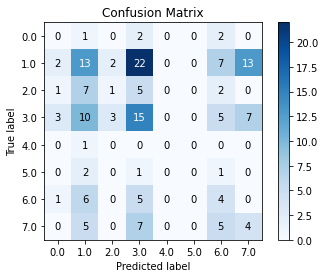

In [176]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(dfy_test, pred)
plt.show()

# AUC ROC CURVE

In [177]:
probas = rfc.predict_proba(dfx_test)

<Figure size 1080x1080 with 0 Axes>

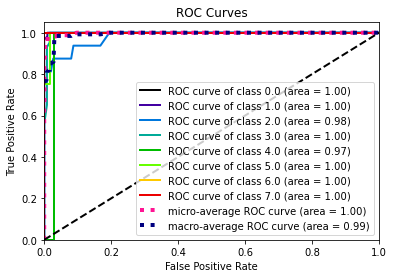

In [180]:
import scikitplot as skplt
skplt.metrics.plot_roc(dfy_test,probas)
plt.show()

# SAVING THE BEST MODEL

In [181]:
import joblib
joblib.dump(rfc,"best_rfcfile111.obj")

['best_rfcfile111.obj']